In [1]:
# 📌 Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest

import ppscore as pps   # agar nahi hai to: pip install ppscore


In [2]:
# 📌 Cell 2: Load Dataset
df = pd.read_csv("adult_with_headers.csv")   
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
df = df.replace(' ?', np.nan)

In [7]:
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [8]:
# 📌 Cell 4: Handle Missing Values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [9]:
# 📌 Cell 5: Scaling Numerical Features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df_std[num_cols])

df_minmax = df.copy()
df_minmax[num_cols] = scaler_minmax.fit_transform(df_minmax[num_cols])

print("Standard Scaled Sample:\n", df_std.head())
print("Min-Max Scaled Sample:\n", df_minmax.head())


Standard Scaled Sample:
         age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0

In [10]:
# 📌 Cell 6: Encoding Categorical Variables
df_encoded = df.copy()
cat_cols = df_encoded.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df_encoded[col].nunique() <= 5:
        dummies = pd.get_dummies(df_encoded[col], prefix=col)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)
    else:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,6,77516,9,13,4,0,1,2174,0,...,38,False,False,False,False,True,False,True,True,False
1,50,5,83311,9,13,2,3,0,0,0,...,38,False,False,False,False,True,False,True,True,False
2,38,3,215646,11,9,0,5,1,0,0,...,38,False,False,False,False,True,False,True,True,False
3,53,3,234721,1,7,2,5,0,0,0,...,38,False,False,True,False,False,False,True,True,False
4,28,3,338409,9,13,2,9,5,0,0,...,4,False,False,True,False,False,True,False,True,False


In [11]:

# Nayi features
df_encoded['capital_diff'] = df_encoded['capital_gain'] - df_encoded['capital_loss']
df_encoded['hours_category'] = pd.cut(df_encoded['hours_per_week'],
                                      bins=[0, 20, 40, 60, 100],
                                      labels=[0, 1, 2, 3])

# Skewed feature transformation (fnlwgt)
df_encoded['fnlwgt_log'] = np.log1p(df_encoded['fnlwgt'])

df_encoded[['capital_diff', 'hours_category', 'fnlwgt_log']].head()


,capital_diff,hours_category,fnlwgt_log
0,2174,1,11.258253
1,0,0,11.330348
2,0,1,12.281398
3,0,1,12.366157
4,0,1,12.732013


In [12]:
# 📌 Cell 8: Outlier Detection with Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
outliers = iso.fit_predict(df_encoded[num_cols])

df_encoded['outlier'] = outliers
print(df_encoded['outlier'].value_counts())

# Outliers remove
df_no_outliers = df_encoded[df_encoded['outlier'] == 1].drop(columns=['outlier'])


outlier
 1    31909
-1      652
Name: count, dtype: int64


In [ ]:
df_no_outliers['hours_category'].unique()


[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [14]:
df_no_outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,capital_diff,hours_category,fnlwgt_log
0,39,6,77516,9,13,4,0,1,2174,0,...,False,False,True,False,True,True,False,2174,1,11.258253
1,50,5,83311,9,13,2,3,0,0,0,...,False,False,True,False,True,True,False,0,0,11.330348
2,38,3,215646,11,9,0,5,1,0,0,...,False,False,True,False,True,True,False,0,1,12.281398
3,53,3,234721,1,7,2,5,0,0,0,...,True,False,False,False,True,True,False,0,1,12.366157
4,28,3,338409,9,13,2,9,5,0,0,...,True,False,False,True,False,True,False,0,1,12.732013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,0,0,...,False,False,True,True,False,True,False,0,1,12.458010
32557,40,3,154374,11,9,2,6,0,0,0,...,False,False,True,False,True,False,True,0,1,11.947140
32558,58,3,151910,11,9,6,0,4,0,0,...,False,False,True,True,False,True,False,0,1,11.931050
32559,22,3,201490,11,9,4,0,3,0,0,...,False,False,True,False,True,True,False,0,0,12.213500


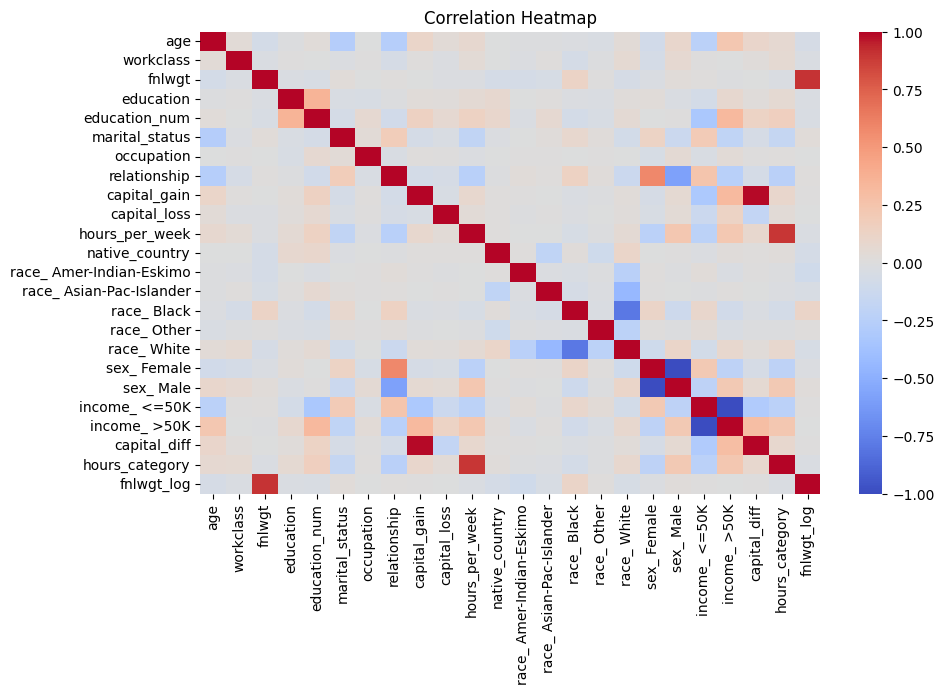

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_no_outliers.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

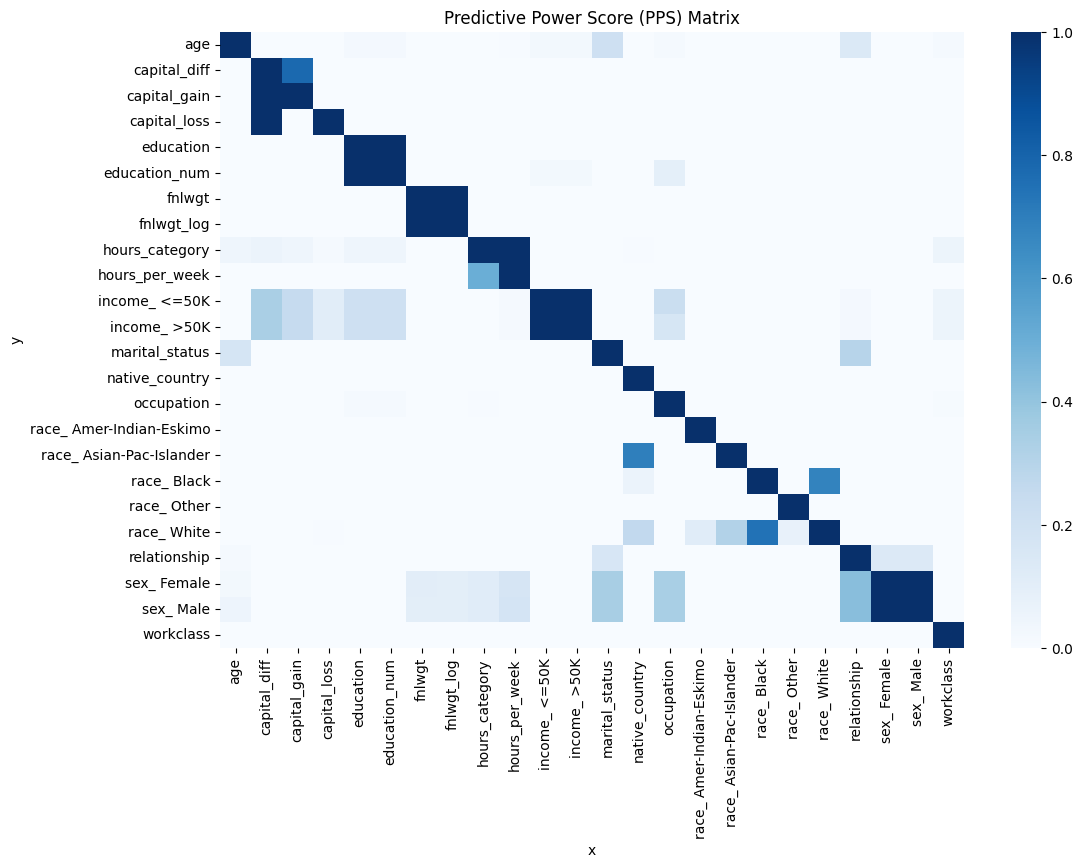

Final Shape (after outlier removal): (31909, 24)


In [16]:


pps_matrix = pps.matrix(df_no_outliers)
plt.figure(figsize=(12,8))
sns.heatmap(pps_matrix.pivot(columns='x', index='y', values='ppscore'), cmap="Blues", annot=False)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

print("Final Shape (after outlier removal):", df_no_outliers.shape)
